## Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data collection and & analysis

In [3]:
mall_customers_dataset = pd.read_csv("dataset/Mall_Customers.csv")

In [4]:
mall_customers_dataset.shape

(200, 5)

In [5]:
mall_customers_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
mall_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
mall_customers_dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Choosing the Annual Income and Spending Score column

In [9]:
X = mall_customers_dataset.iloc[:, -2:].values

In [11]:
# X

## Choose correct number of clusters

WCSS --> Within Clusters Sums of Squares

In [13]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

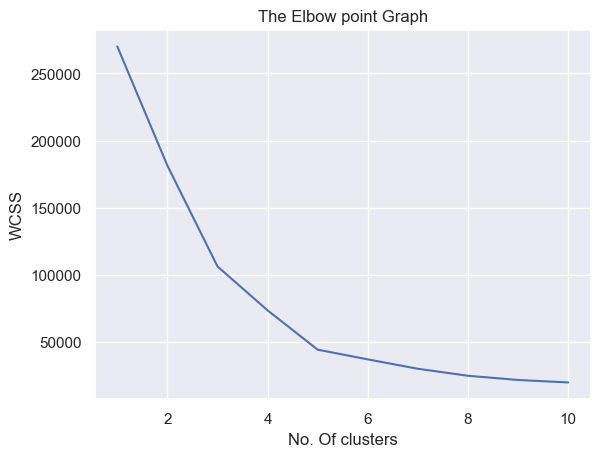

In [16]:
## plot an elbow graph
sns.set()
# plt.figure(figsize=(10, 10))
plt.plot(range(1, 11), wcss)
plt.title("The Elbow point Graph")
plt.xlabel("No. Of clusters")
plt.ylabel("WCSS")
plt.show()

## Optimum number of clusters = 5

### Training the k-Means Clustering Model

In [20]:
kmeans = KMeans(n_clusters=5, n_init=10, init="k-means++", random_state=0)

# return a label for each data point based on their cluster
y = kmeans.fit_predict(X)

In [21]:
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

## Visualizing all the clusters

Text(0, 0.5, 'Spending Score')

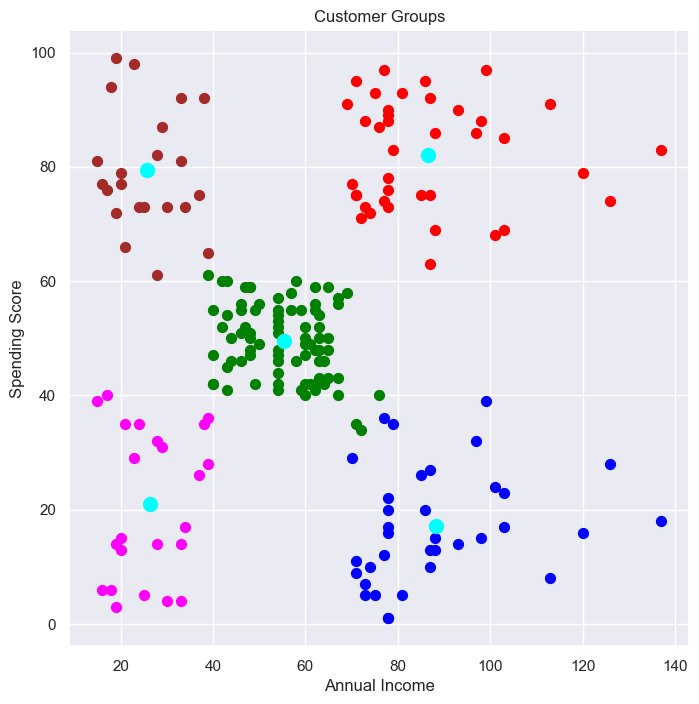

In [32]:
## Plotting all the clusters and their Centroids

plt.figure(figsize=(8, 8))

plt.scatter(X[Y==0, 0], X[Y==0, 1], s=50, c="green", label="Cluster 1")
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=50, c="red", label="Cluster 2")
plt.scatter(X[Y==2, 0], X[Y==2, 1], s=50, c="blue", label="Cluster 3")
plt.scatter(X[Y==3, 0], X[Y==3, 1], s=50, c="magenta", label="Cluster 4")
plt.scatter(X[Y==4, 0], X[Y==4, 1], s=50, c="brown", label="Cluster 5")

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=100, c="cyan", label="Centroids")

plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

In [30]:
X[y==0, 0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76])